In [1]:

# Requirements: Matplotlib, Numpy, functions_util.py, index.py#, fitting_functions_ZNE.py, h5py

import os

#Move the directory back to Duke_Data
#Check if the current directory is Duke_Data
if os.getcwd().split('/')[-1] != 'DUKE_ANALOG_ZNE_DATA':
    #os.chdir('Duke_Data')
    os.chdir('../')
    #print(os.getcwd().split('/')[-1])
    #pass
else:
    pass
#print(os.getcwd())
from scripts.index import print_index, get_experiment, index_folder
from functions_util import cetina_thermal_exp, cetina_envelope_exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import numpy as np
import h5py
from fitting_functions_ZNE import linear_ZNE, third_no_first_ZNE


def fit(function, x_axis, y_axis, return_cov=False, p0=[.05,2000000], weights=None):
    # Fit the data to the function
    popt, pcov = curve_fit(function, x_axis, y_axis, p0=p0, sigma=weights, absolute_sigma=True, maxfev=10000)
    
    if return_cov:
        return popt, pcov
    return popt

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
# import all the useful lib in python
from matplotlib import artist as art
%matplotlib inline
import scipy as sp
# import pandas as pd
import pathlib
import os
import datetime as dt
import glob
from IPython.display import clear_output
from numpy.fft import fft, ifft

from h5analysis import *
from qsim_functions import*


In [3]:

#pairs = [(11,12), (12,13),(13,14)]
#bases = ['x', 'y', 'z']
#pairs_names = [265, 259, 266]
# basis_names = [268, 271, 269]
# foldername = 'Population_4_tw0'
# pairs_names = [str(name) for name in pairs_names]
# qubits = [11,12,13,14]
# shots = 150
foldername = 'TFIM_Bell'
#bases = ['x0', 'y0','x1','y1']
bases = ['x','y']
qubits = [12,13]
basis_names = [397, 398]
shots = 600



# for name_index in range(len(pairs_names)):
#     name = pairs_names[name_index]
#     if '000563' in pairs_names:
#         pass
#     else:
#         name = '000563' + name
#         pairs_names[name_index] = name
basis_names = [str(name) for name in basis_names]
for name_index in range(len(basis_names)):
    name = basis_names[name_index]
    if '000563' in basis_names:
        pass
    else:
        name = '000563' + name
        basis_names[name_index] = name
full_data_folder_path = './data/' + foldername + '/'


In [4]:
COUNTS_THRESHOLD = 1


In [5]:
# leakage_matrix = np.zeros((30, len(pairs_names)))
# flopping_matrix = np.zeros((30, len(pairs_names)))
# flopping_std_matrix = np.zeros((30, len(pairs_names)))
# times = None


# print(os.getcwd())
# for file_id_index in range(len(pairs_names)):
#     file_id = pairs_names[file_id_index]
#     pair = pairs[file_id_index]
#     #pair = names[0]
#     file = h5py.File(full_data_folder_path + file_id + '-RFSoCSequence.h5', 'r')
#     archive = file['archive']
#     dataset = file['datasets']
#     x_vals = dataset['data.rfsoc_pulse_sequence.x_values']
#     times = np.array(x_vals)
#     print(times)
#     raw_counts = dataset['data.rfsoc_pulse_sequence.raw_counts']
#     counts = np.asarray(raw_counts)
#     print(counts.shape)
#     measurements = np.zeros((2, shots, 30))
#     for pair_index in range(len(pair)):
#         qubit = pair[pair_index]
#         measurements[pair_index,:,:] = 1 < counts[qubit,:,:]
#         #print(measurements)
#     #Convert the measurements to bitstrings. Convert to string, then append the like indices
#     counts_bitstrings = np.zeros((shots, 30), dtype='<U5')
#     expectations = np.zeros((shots, 30))
#     for i in range(shots):
#         for j in range(30):
#             expectation = ((measurements[0,i,j]*2-1) - (measurements[1,i,j]*2-1))/2
#             bitstring = str(int(measurements[0,i,j])) + str(int(measurements[1,i,j]))
#             #print(bitstring)
#             counts_bitstrings[i,j] = bitstring
#             expectations[i,j] = expectation
#     #average expectations across the 150 axis:
#     expectations_avg = np.mean(expectations, axis=0)
#     #Convert counts_bitstrings to a dictionary of counts
#     print(counts_bitstrings)
#     counts_array  = np.zeros((30,), dtype=dict)
#     for i in range(30):
#         counts_array[i] = {}
#         for j in range(shots):
#             if counts_bitstrings[j,i] in counts_array[i]:
#                 counts_array[i][counts_bitstrings[j,i]] += 1
#             else:
#                 counts_array[i][counts_bitstrings[j,i]] = 1
                
#     leakage = np.zeros((30,))
#     for i in range(30):
#         if '00' in counts_array[i]:
#             leakage[i] = counts_array[i]['00']/shots
#         if '11' in counts_array[i]:
#             leakage[i] += counts_array[i]['11']/shots
#     leakage_conv = np.zeros((30,))
#     for i in range(30):
#         leakage_conv[i] = np.mean(leakage[i:i+4])
#     leakage_matrix[:,file_id_index] = leakage_conv
#     flopping_matrix[:,file_id_index] = expectations_avg
#     flopping_std = np.std(expectations, axis=0)
#     flopping_std_matrix[:,file_id_index] = flopping_std
    
# #print(counts_array)

In [6]:
# cmap = cm.get_cmap('viridis')
# fig = plt.figure()
    
# def exp_fit(x, b, c):
#     return np.exp(-b*x)*np.cos(2*c*x)
# gammas = np.zeros((len(pairs_names),))
# for name_index in range(len(pairs_names)):
#     popt, pcov = curve_fit(exp_fit, times, flopping_matrix[:,name_index], p0=[0.05, 2*np.pi])
#     gammas[name_index] = popt[0]
#     color = cmap(name_index/len(pairs_names))
#     plt.plot(times, 1-leakage_matrix[:,name_index], label = pairs[name_index], color=color)
#     plt.plot(times, -1+leakage_matrix[:,name_index], color=color)
#     print(popt[1])
#     plt.errorbar(times, flopping_matrix[:,name_index], yerr = flopping_std_matrix[:,name_index]/np.sqrt(150), color=color)
# print(gammas)



# #make it bigger:
# fig.set_size_inches(10, 6)
# plt.legend()

In [7]:
shots = 600
measurement_data = np.zeros((30, len(basis_names)), dtype=dict)
#flopping_matrix = np.zeros((30, len(pairs_names)))
#flopping_std_matrix = np.zeros((30, len(pairs_names)))
#times = None
times_start = None
times_end = None
all_good_strings = ['00', '11']#, '0001', '0010', '0100', '1000', '1110', '1101', '1011', '0111']
expectations_matrix = np.zeros((30,len(basis_names)))
qubit_0_magnetization = np.zeros((30,len(basis_names)))
leakage_factor = np.zeros((30,len(basis_names)))

print(os.getcwd())
for file_id_index in range(len(basis_names)):
    
    file_id = basis_names[file_id_index]
    axis = bases[file_id_index]
    #pair = names[0]
    file = h5py.File(full_data_folder_path + file_id + '-RFSoCSequence.h5', 'r')
    archive = file['archive']
    dataset = file['datasets']
    x_vals = dataset['data.rfsoc_pulse_sequence.x_values']
    times = np.array(x_vals)
    if file_id_index == 0:
        times_start = times
    if file_id_index == 3:
        times_end = times
    #print(times)
    raw_counts = dataset['data.rfsoc_pulse_sequence.raw_counts']
    counts = np.asarray(raw_counts)
    print(counts.shape)
    measurements = np.zeros((len(qubits), shots, 30))
    for qubit_index in range(len(qubits)):
        qubit = qubits[qubit_index]
        #qubit = pair[pair_index]
        measurements[qubit_index,:,:] = 1 < counts[qubit,:,:]
        #print(measurements)
    #Convert the measurements to bitstrings. Convert to string, then append the like indices
    counts_bitstrings = np.zeros((shots, 30), dtype='<U5')
    for i in range(shots):
        for j in range(30):
            bitstring = [str(int(measurements[qubit_index,i,j])) for qubit_index in range(len(qubits))]
            bitstring = "".join(bitstring)
            
            #print(measurements[:,i,j])
            #print(bitstring)
            #str(int(measurements[0,i,j])) + str(int(measurements[1,i,j]))
            #print(bitstring)
            counts_bitstrings[i,j] = bitstring
    counts_dicts = np.zeros(30, dtype=dict)
    for j in range(30):
        magnetization = 0
        for shot_index in range(shots):
            magnetization += measurements[0, shot_index, j]*2 - 1
        qubit_0_magnetization[j,file_id_index] = magnetization/shots
        temp_dict = {}#
        for string in all_good_strings:
            temp_dict[string] = 0
        #{'0000':0, '1111':0}
        for i in range(shots):
            if counts_bitstrings[i,j] in temp_dict:
                temp_dict[counts_bitstrings[i,j]] += 1/shots
            else:
                temp_dict[counts_bitstrings[i,j]] = 1/shots
        counts_dicts[j] = temp_dict
        expectation = 0
        for key in temp_dict.keys():
            if key not in all_good_strings:
                leakage_factor[j,file_id_index] += temp_dict[key]/shots
            #count the number of zeros. If it is even, add the value. If it is odd, subtract the value
            num_zeros = key.count('0')
            if num_zeros % 2 == 0:
                expectation += temp_dict[key]
            else:
                expectation -= temp_dict[key]
        expectations_matrix[j,file_id_index] = expectation
    measurement_data[:,file_id_index] = counts_dicts
    

    
#print(counts_array)

/Users/thomassteckmann/Duke_Analog_ZNE_data
(23, 600, 30)
(23, 600, 30)


In [8]:
print(measurement_data)

[[{'00': 0, '11': 0.9533333333333418, '01': 0.02, '10': 0.02666666666666667}
  {'00': 0.25166666666666726, '11': 0.2566666666666672, '10': 0.29500000000000015, '01': 0.19666666666666696}]
 [{'00': 0.43333333333333207, '11': 0.1283333333333332, '01': 0.3000000000000001, '10': 0.13833333333333325}
  {'00': 0.015000000000000001, '11': 0.805000000000005, '10': 0.10166666666666654, '01': 0.07833333333333325}]
 [{'00': 0.8316666666666723, '11': 0.02, '10': 0.1083333333333332, '01': 0.03999999999999999}
  {'00': 0.516666666666665, '11': 0.09166666666666656, '01': 0.2700000000000004, '10': 0.1216666666666665}]
 [{'00': 0.0716666666666666, '11': 0.6566666666666683, '10': 0.2150000000000004, '01': 0.05666666666666662}
  {'00': 0.6200000000000008, '11': 0.04666666666666664, '10': 0.23500000000000054, '01': 0.09833333333333322}]
 [{'00': 0.08833333333333324, '11': 0.49999999999999806, '01': 0.3066666666666667, '10': 0.10499999999999987}
  {'00': 0.06666666666666661, '11': 0.6400000000000012, '10':

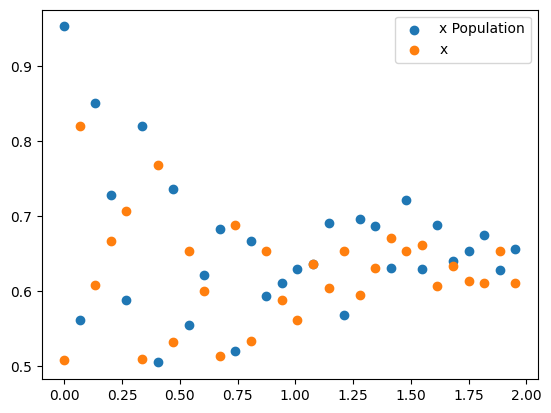

In [24]:
#get bitstrings for 0000, 1111, and one hamming distance from each:
Xpops = [sum([measurement_data[i,0][string] for string in all_good_strings]) for i in range(30)]
Ypops = [sum([measurement_data[i,1][string] for string in all_good_strings]) for i in range(30)]
#comb_x_pop = np.concatenate((Xpops, Ypops))

plt.scatter(times_start, Xpops, label = 'x Population')
plt.scatter(times_start, Ypops, label = 'x')
#plt.vlines(1.4, 0, 1, color='red', label='~Expected maximum population')
plt.legend()

(30, 2)


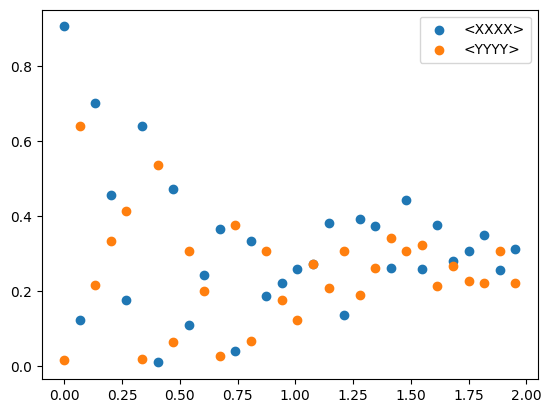

In [18]:
#get bitstrings for 0000, 1111, and one hamming distance from each:
#Xpops = [sum([measurement_data[i,0][string] for string in all_good_strings]) for i in range(30)]
#Ypops = [sum([measurement_data[i,1][string] for string in all_good_strings]) for i in range(30)]
#Xpops = [measurement_data[i,0]['0000'] + measurement_data[i,0]['1111'] for i in range(30)]
#Ypops = [measurement_data[i,1]['0000'] + measurement_data[i,1]['1111'] for i in range(30)]
print(expectations_matrix.shape)
plt.scatter(times_start, expectations_matrix[:,0], label = '<XXXX>')
plt.scatter(times_start, expectations_matrix[:,1], label = '<YYYY>')
plt.legend()

In [19]:
#combined x_pop


In [20]:
import numpy as np
from numpy import kron
#import expm
from scipy.linalg import expm
import matplotlib.pyplot as plt

Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
XX = kron(X, X)
IZ = kron(np.eye(2), Z)
ZI = kron(Z, np.eye(2))
XI = kron(X, np.eye(2))
YI = kron(Y, np.eye(2))

XX = kron(X, X)
YY = kron(Y, Y)

#IZ = kron(np.eye(2), Z)

plus = np.array([[1], [1]]) / np.sqrt(2)
minus = np.array([[1], [-1]]) / np.sqrt(2)
up = np.array([[1], [0]])
down = np.array([[0], [1]])
plusY = np.array([[1], [1j]]) / np.sqrt(2)
minusY = np.array([[1], [-1j]]) / np.sqrt(2)


plusx2 = np.kron(plus, plus)
minusx2 = np.kron(minus, minus)
upx2 = np.kron(up, up)
downx2 = np.kron(down, down)
plusYx2 = np.kron(plusY, plusY)
minusYx2 = np.kron(minusY, minusY)


J = 1.48

upProj = upx2 @ upx2.conj().T
downProj = downx2 @ downx2.conj().T

Xproj = plusx2 @ plusx2.conj().T + minusx2 @ minusx2.conj().T
Yproj = plusYx2 @ plusYx2.conj().T + minusYx2 @ minusYx2.conj().T
h = 9*J

HTFIM = J * XX + h * (ZI + IZ)
Uttfim = lambda t: expm(-1j * t * HTFIM)

#TFIM_rotation = lambda t: expm(1j*t*h/2*0*(ZII + IIZ + IZI))
#TFIM_rotation = lambda t: expm(1j*t*h*(ZII + IIZ + IZI))

#RY = expm(1j*np.pi/4 * (YII + IYI + IIY))



times_sim = np.linspace(0, 2, 100)
times_sim = np.concatenate((times, times_sim))
times_sim.sort()
statesTFIM = [Uttfim(t) @ plusx2 for t in times_sim]



resultsTFIM_single_x = np.array([state.conj().T @ XI @ state for state in statesTFIM])
resultsTFIM_single_y = np.array([state.conj().T @ YI @ state for state in statesTFIM])

resultsTFIM_polarization_x = np.array([state.conj().T @ Xproj @ state for state in statesTFIM])
resultsTFIM_polarization_y = np.array([state.conj().T @ Yproj @ state for state in statesTFIM])

resultsTFIM_XXXX = np.array([state.conj().T @ XX @ state for state in statesTFIM])
resultsTFIM_YYYY = np.array([state.conj().T @ YY @ state for state in statesTFIM])


#print(np.array(resultsXY))

/Users/thomassteckmann/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/thomassteckmann/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


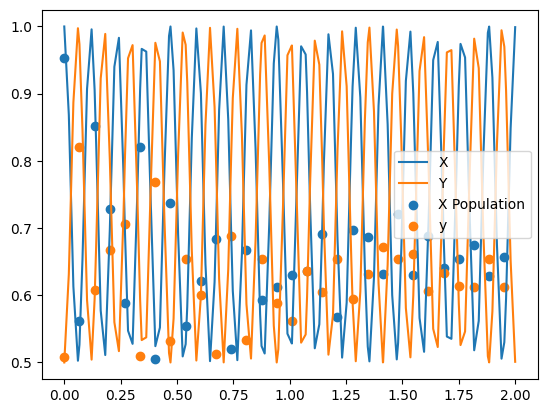

In [21]:
plt.plot(times_sim, resultsTFIM_polarization_x[:,0,0], label='X')
plt.plot(times_sim, resultsTFIM_polarization_y[:,0,0], label='Y')
#get bitstrings for 0000, 1111, and one hamming distance from each:
#Xpops = [sum([measurement_data[i,0][string] for string in all_good_strings]) for i in range(30)]
#Ypops = [sum([measurement_data[i,1][string] for string in all_good_strings]) for i in range(30)]
#Xpops = [measurement_data[i,0]['0000'] + measurement_data[i,0]['1111'] for i in range(30)]
#Ypops = [measurement_data[i,1]['0000'] + measurement_data[i,1]['1111'] for i in range(30)]
plt.scatter(times_start, Xpops, label = 'X Population')
plt.scatter(times_start, Ypops, label = 'y')
plt.legend()
plt.legend()

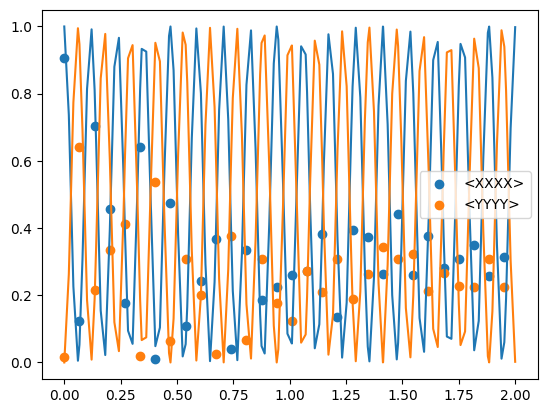

In [22]:
XX = expectations_matrix[:,0]
YY = expectations_matrix[:,1]
plt.plot(times_sim, resultsTFIM_XXXX[:,0,0])
plt.plot(times_sim, resultsTFIM_YYYY[:,0,0])
plt.scatter(times_start, XX, label = '<XXXX>')
plt.scatter(times_start, YY, label = '<YYYY>')
plt.legend()

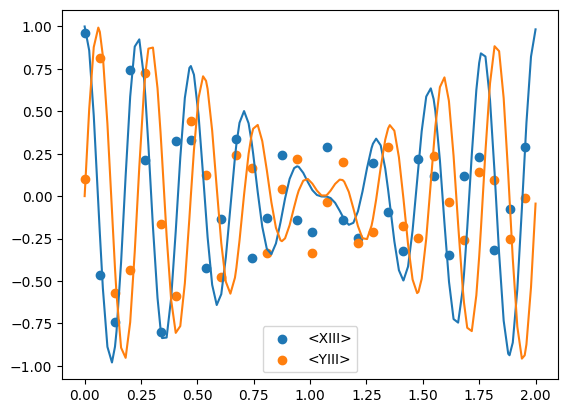

In [23]:
plt.plot(times_sim, resultsTFIM_single_x[:,0,0])
plt.plot(times_sim, resultsTFIM_single_y[:,0,0])
#single_comb_x = np.concatenate((qubit_0_magnetization[:,0], qubit_0_magnetization[:,1]))
#single_comb_y = np.concatenate((qubit_0_magnetization[:,3], qubit_0_magnetization[:,2]))
#plt.plot(times_sim, resultsTFIM_YYYY[:,0,0])
plt.scatter(times_start, qubit_0_magnetization[:,0], label = '<XIII>')
plt.scatter(times_start, qubit_0_magnetization[:,1], label = '<YIII>')
plt.legend()